In [74]:
import sys
print(sys.executable)


c:\Users\MUDDASSIR\AppData\Local\Programs\Python\Python313\python.exe


In [75]:
# Digital Twin initialization
digital_twin = patient_df.copy()


In [76]:
import pandas as pd
print("Jupyter is working")


Jupyter is working


In [77]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
import pandas as pd
import numpy as np

df = pd.read_csv("diabetes.csv")

print(df.shape)
df.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
zero_check = (df == 0).sum()
zero_check


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [80]:
cols = ['Glucose', 'BloodPressure', 'BMI', 'Insulin']

for col in cols:
    df[col] = df[col].fillna(df[col].median())


In [81]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
def predict_diabetes_risk(patient_data, model):
    """
    patient_data: pandas DataFrame with 1 row
    model: trained ML model
    returns probability of diabetes
    """
    risk = model.predict_proba(patient_data)[0][1]
    return risk


In [83]:
# Create a sample patient (virtual twin)
patient = {
    "Pregnancies": 2,
    "Glucose": 150,
    "BloodPressure": 80,
    "SkinThickness": 30,
    "Insulin": 120,
    "BMI": 32.0,
    "DiabetesPedigreeFunction": 0.6,
    "Age": 45
}

patient_df = pd.DataFrame([patient])


In [84]:
patient_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,150,80,30,120,32.0,0.6,45


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

model = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X, y)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may n

In [86]:
import sklearn
print(sklearn.__version__)


1.8.0


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [88]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

model = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

model.fit(X, y)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may n

In [89]:
def predict_diabetes_risk(patient_data, model):
    """
    patient_data: pandas DataFrame with 1 row
    model: trained ML model
    returns probability of diabetes
    """
    risk = model.predict_proba(patient_data)[0][1]
    return risk


In [90]:
# Create a sample patient (virtual twin)
patient = {
    "Pregnancies": 2,
    "Glucose": 150,
    "BloodPressure": 80,
    "SkinThickness": 30,
    "Insulin": 120,
    "BMI": 32.0,
    "DiabetesPedigreeFunction": 0.6,
    "Age": 45
}

patient_df = pd.DataFrame([patient])


In [91]:
baseline_risk = predict_diabetes_risk(patient_df, model)
baseline_risk


np.float64(0.5083019137665384)

In [92]:
no_change = patient_df.copy()
no_change["Glucose"] += 5
no_change["BMI"] += 0.5

risk_no_change = predict_diabetes_risk(no_change, model)


In [93]:
improved = patient_df.copy()
improved["Glucose"] -= 15
improved["BMI"] -= 2.0

risk_improved = predict_diabetes_risk(improved, model)


In [94]:
medication = patient_df.copy()
medication["Glucose"] -= 25
medication["Insulin"] += 30

risk_medication = predict_diabetes_risk(medication, model)


In [95]:
import pandas as pd

results = pd.DataFrame({
    "Scenario": ["Current", "No Change", "Lifestyle Improved", "Medication Improved"],
    "Risk": [baseline_risk, risk_no_change, risk_improved, risk_medication]
})

results


,Scenario,Risk
0,Current,0.508302
1,No Change,0.562345
2,Lifestyle Improved,0.339975
3,Medication Improved,0.295823


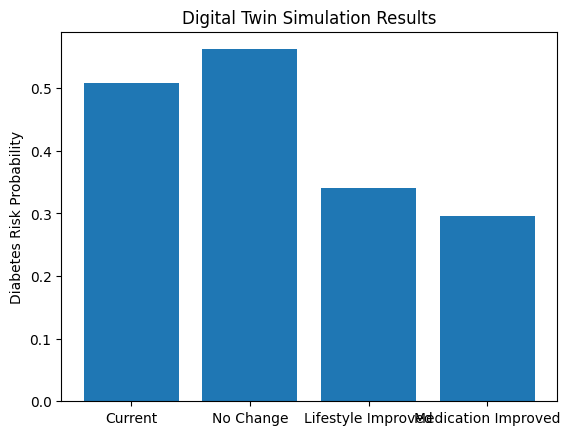

In [96]:
import matplotlib.pyplot as plt

plt.bar(results["Scenario"], results["Risk"])
plt.ylabel("Diabetes Risk Probability")
plt.title("Digital Twin Simulation Results")
plt.show()


In [97]:
def run_simulation(digital_twin, model, months=12, lifestyle="no_change"):
    risks = []
    twin = digital_twin.copy()

    for _ in range(months):
        twin = simulate_month(twin, lifestyle)
        risk = predict_diabetes_risk(twin, model)
        risks.append(risk)

    return risks


In [99]:
import numpy as np

def simulate_month(digital_twin, lifestyle="no_change"):
    twin = digital_twin.copy()

    if lifestyle == "no_change":
        twin["Glucose"] += np.random.normal(2, 1)
        twin["BMI"] += np.random.normal(0.1, 0.05)

    elif lifestyle == "improved":
        twin["Glucose"] -= np.random.normal(3, 1)
        twin["BMI"] -= np.random.normal(0.2, 0.05)

    return twin


In [100]:
no_change_risk = run_simulation(digital_twin, model, lifestyle="no_change")
improved_risk = run_simulation(digital_twin, model, lifestyle="improved")


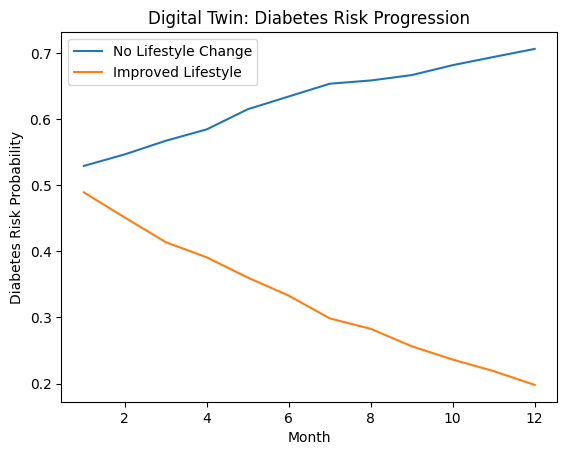

In [101]:
import matplotlib.pyplot as plt

months = range(1, len(no_change_risk) + 1)

plt.figure()
plt.plot(months, no_change_risk, label="No Lifestyle Change")
plt.plot(months, improved_risk, label="Improved Lifestyle")

plt.xlabel("Month")
plt.ylabel("Diabetes Risk Probability")
plt.title("Digital Twin: Diabetes Risk Progression")
plt.legend()
plt.show()


In [102]:
print("Final Risk (No Change):", no_change_risk[-1])
print("Final Risk (Improved):", improved_risk[-1])


Final Risk (No Change): 0.7066467663269798
Final Risk (Improved): 0.19790277807604542


In [103]:
def interpret_risk(risk):
    if risk < 0.3:
        return "Low Risk"
    elif risk < 0.6:
        return "Moderate Risk"
    else:
        return "High Risk"


In [104]:
interpret_risk(no_change_risk[-1]), interpret_risk(improved_risk[-1])


('High Risk', 'Low Risk')